Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Load and Explore Dataset

In [2]:
# Load the dataset
breast_cancer = load_breast_cancer()

# Check the sample and target sizes
print(f"Sample Size: {breast_cancer.data.shape}")
print(f"Target Size: {breast_cancer.target.shape}")


Sample Size: (569, 30)
Target Size: (569,)


Splitting the Data for Training and Testing

In [3]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Display the training and testing set sizes
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (455, 30)
Testing set size: (114, 30)


Create and Train the GaussianNB Model

In [4]:
# Create the model (Gaussian Naive Bayes)
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

GaussianNB()

Predicting the Test Set and Estimator Score

In [6]:
# Predicting the test set
y_pred = nb.predict(X_test)

# Estimator method score (Accuracy)
score = nb.score(X_test, y_test)
print(f"Model Accuracy: {score}")

Model Accuracy: 0.9736842105263158


Confusion Matrix

Confusion Matrix:
[[40  3]
 [ 0 71]]


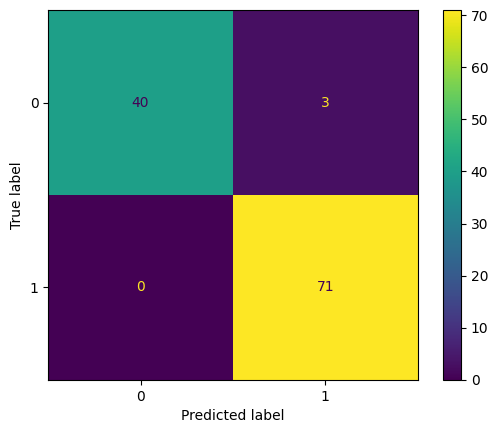

In [7]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualization of the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

Classification Report

In [8]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



K-Fold Cross-Validation

In [9]:
# Using K-Fold Cross-Validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

# Perform cross-validation
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean()}")

Cross-Validation Scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean Cross-Validation Score: 0.9384711779448622


Running Multiple Models to Find the Best One

In [10]:
# Running multiple models to find the best one
estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

# Train and evaluate each model
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    score = estimator.score(X_test, y_test)
    print(f"{name} Accuracy: {score}")

GaussianNB Accuracy: 0.9736842105263158
KNeighborsClassifier Accuracy: 0.956140350877193
LogisticRegression Accuracy: 0.956140350877193
SVC Accuracy: 0.9473684210526315
